# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Import necessory libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# **Reading and understanding the data**

In [3]:
bikes = pd.read_csv('/content/drive/MyDrive/AlmaBetter/00_Team Capstone Projects/02_Supervised ML_Regression/Bike Sharing Demand Prediction/Bike Sharing Demand Prediction/Data _ Resources/SeoulBikeData.csv',encoding= 'unicode_escape')
bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Lets check the dimensions of the dataset
bikes.shape

(8760, 14)

In [5]:
# Information of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can observe here that there are no missing values in the dataset.
But we can see the datatypes of `Date` column shhould be Datetime.

In [6]:
# Lets change the date columns datatype to datetime.
bikes['Date'] = pd.to_datetime(bikes['Date'])

In [7]:
#Checking the datatypes of the dataset
bikes.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

- Also we will derive two new features from date columns. First : Month and Second : Year.

In [8]:
# New features
bikes['Month'] = bikes['Date'].dt.month.astype('object')
bikes['Year'] = bikes['Date'].dt.year.astype('object')

In [9]:
# Now we can drop `Date variable now.
bikes.drop('Date', axis=1, inplace=True)

In [10]:
# Information of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   objec

In [11]:
# Lets map numbers of month to month name
bikes['Month'] = bikes['Month'].map({1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [12]:
# Statistical summary of the numerical features
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#**Exploratory Data Analysis**
### **Univariate Analysis**

In [13]:
bikes.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year'],
      dtype='object')

In [14]:
# Lets separate categorical and numerical feature
cat_col = bikes.columns[bikes.dtypes=="object"].tolist()
print(cat_col)

# Numerical Columns
num_col = bikes.select_dtypes(include=[np.number]).columns.tolist()
num_col


['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Year']


['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [15]:
# remove target variable from num_cols list
num_col.remove('Rented Bike Count')
num_col

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

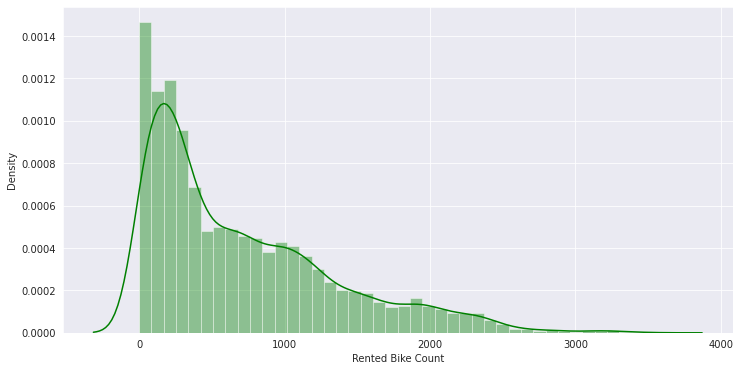

In [16]:
from seaborn.palettes import dark_palette
# Target Variable distribution
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.distplot(bikes['Rented Bike Count'], color="green")
plt.show()

In [17]:
# Lets check the skewness and kurtosis of the target variable
print(bikes['Rented Bike Count'].skew())
print(bikes['Rented Bike Count'].kurt())

1.1534281773679014
0.8533869902003848


- Looking at the skewness and kutosis, we can go with the distribution as it is.

#### **Univariate Categorical Analysis**

Value Counts for Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64




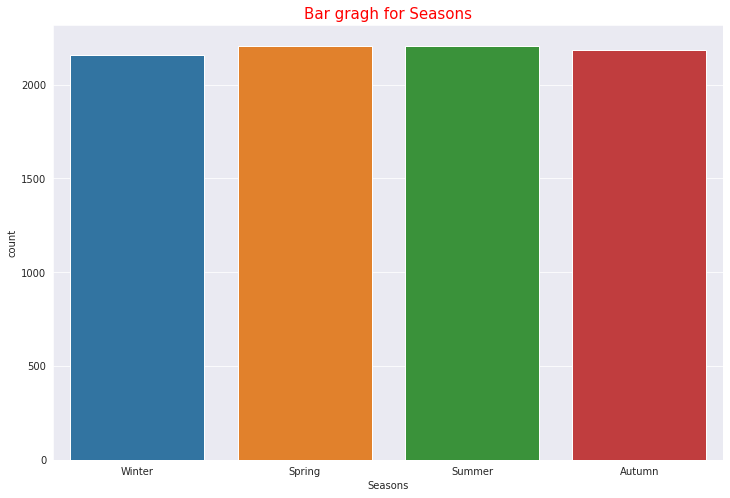


Value Counts for Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64




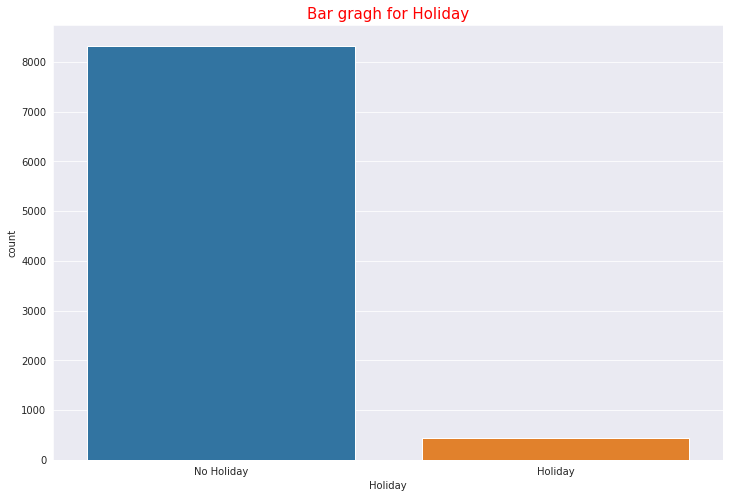


Value Counts for Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64




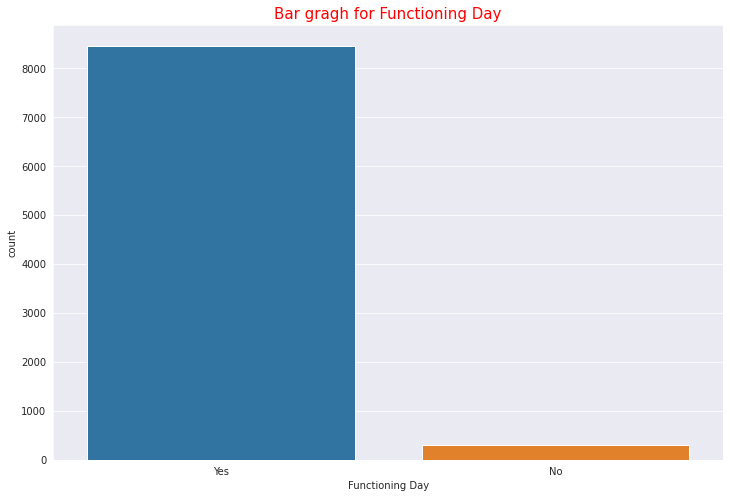


Value Counts for Month
Jan    744
Mar    744
May    744
Jul    744
Aug    744
Oct    744
Dec    744
Apr    720
Jun    720
Sep    720
Nov    720
Feb    672
Name: Month, dtype: int64




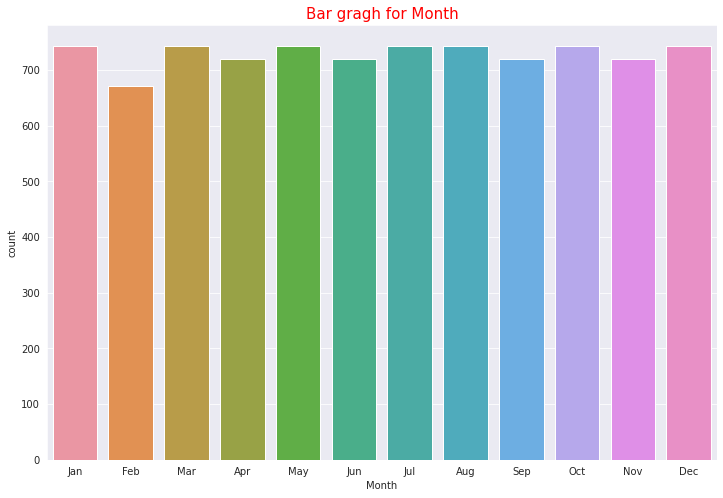


Value Counts for Year
2018    8016
2017     744
Name: Year, dtype: int64




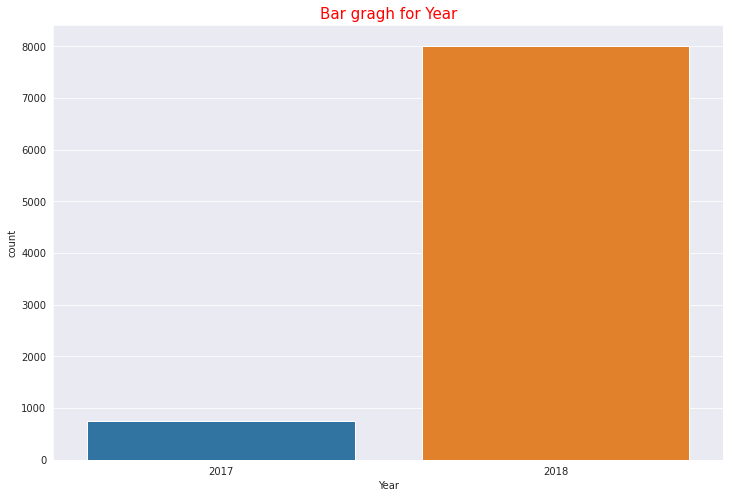

In [18]:
# Lets check the value counts for the categorical columns and plot bar gragh for the same
sns.set_style("darkgrid")
for cols in cat_col:
  print("Value Counts for {}".format(cols))
  print(bikes[cols].value_counts())
  print("\n")


  # Lets plot bargraphs for the categorical columns
  plt.figure(figsize=(12,8))
  #bikes[cols].value_counts(normalize=True).plot.bar(color='green')
  sns.countplot(bikes[cols])
  plt.title("Bar gragh for {}".format(cols), color='red', fontsize=15)
  # plt.xlabel(cols, color='red',fontsize=12)
  # plt.ylabel("Count", color='red',fontsize=12)
  plt.show()
  print('='*50,"\n")

**Inferences:**
- There is almost equal observations in all the seasons.
- Counts for rented bikes is more on office/work(No Holiday) which I think is obivious.
- As of now it seems that both `Holiday` and `Functioning Day` columns are highly colinear with themselves as both have same demand for rented bikes. Lets check this hypothesis and drop one of them if have corelation.

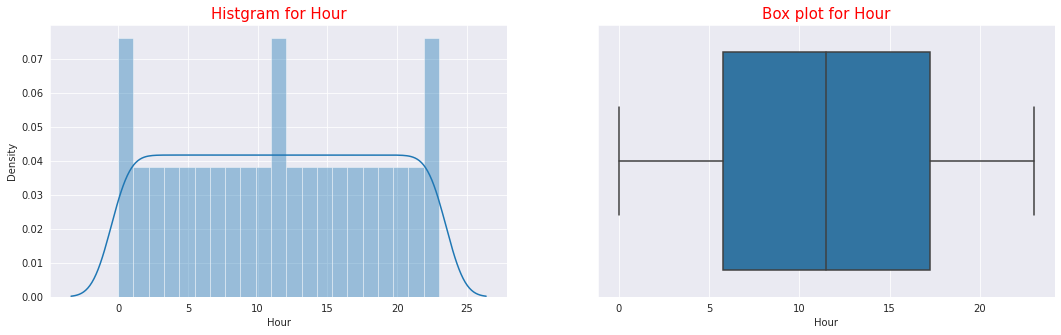

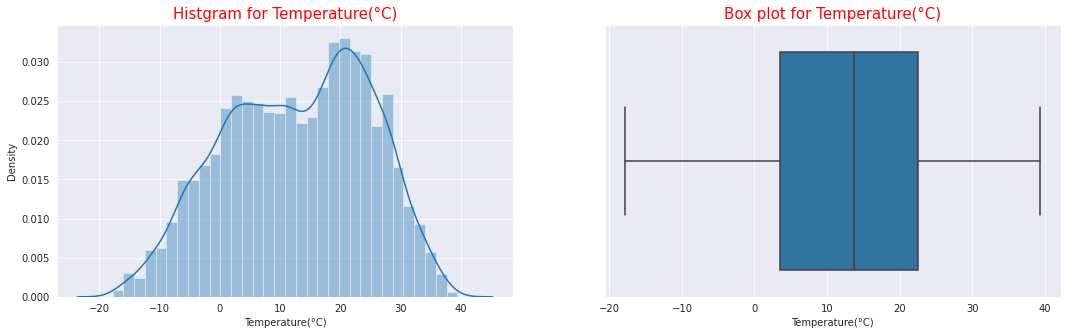

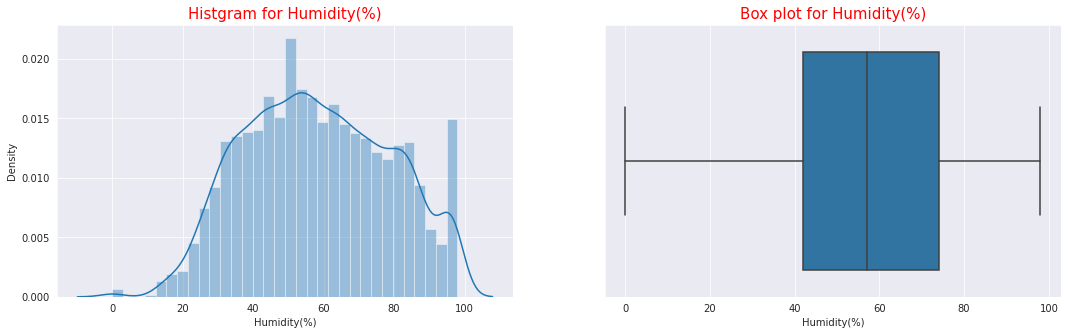

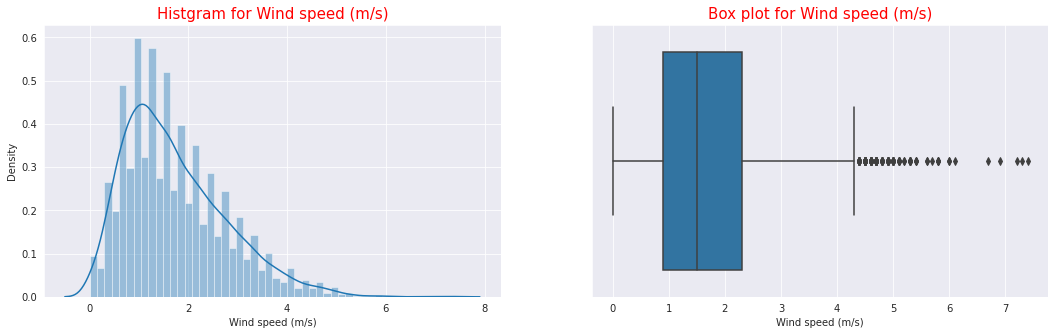

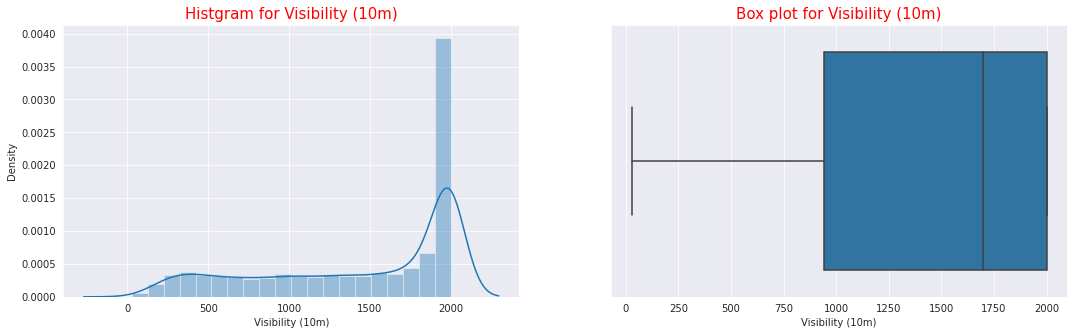

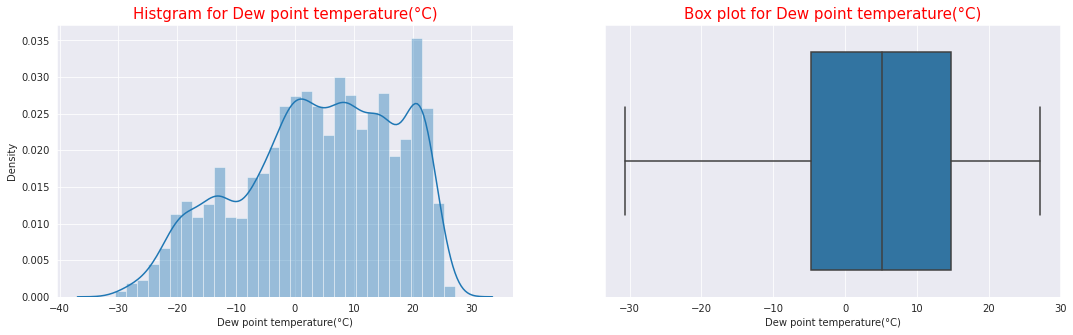

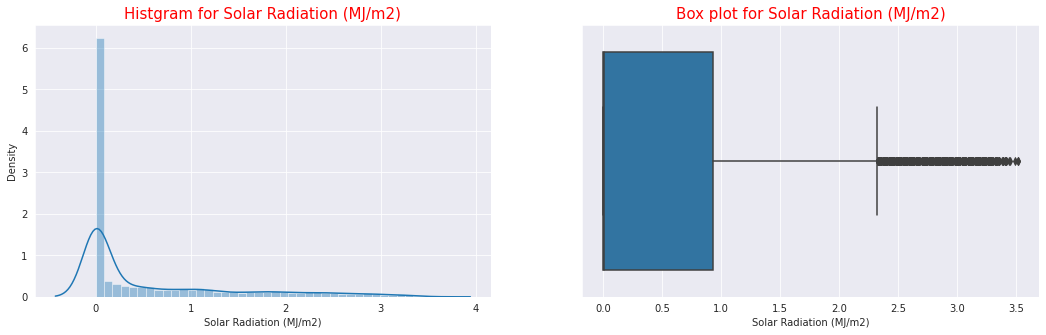

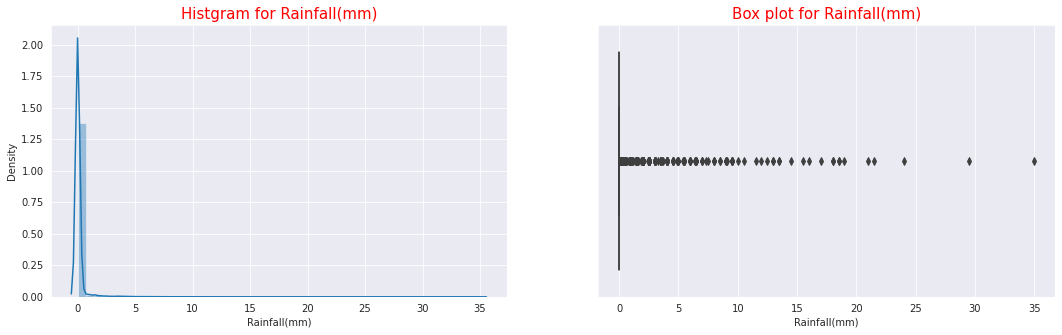

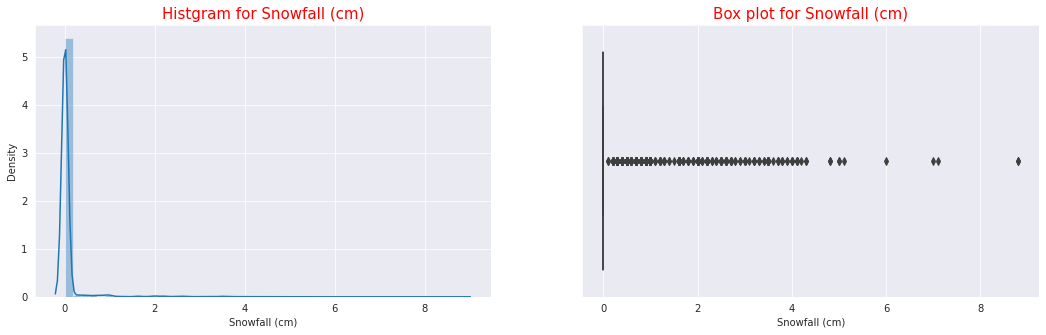

In [19]:
# Lets plot kde plot for all numerical columns along with boxplots
for cols in num_col:
  plt.figure(figsize=(18,5))
  # Kde plot
  plt.subplot(1,2,1)
  sns.distplot(bikes[cols])
  plt.title('Histgram for {}'.format(cols), color='red', fontsize=15)

  # Print sepeartor
  print("\n",'='*140,"\n")

  # Box plot
  plt.subplot(1,2,2)
  sns.boxplot(bikes[cols])
  plt.title('Box plot for {}'.format(cols), color='red', fontsize=15)
  plt.show()  


**Inference**
- 
- 
- 

### **Bivariate Analysis**
##### **Categorical with Target variable**

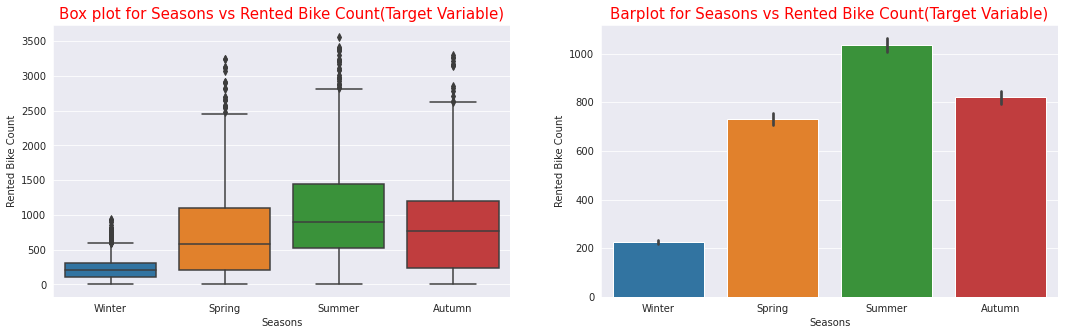

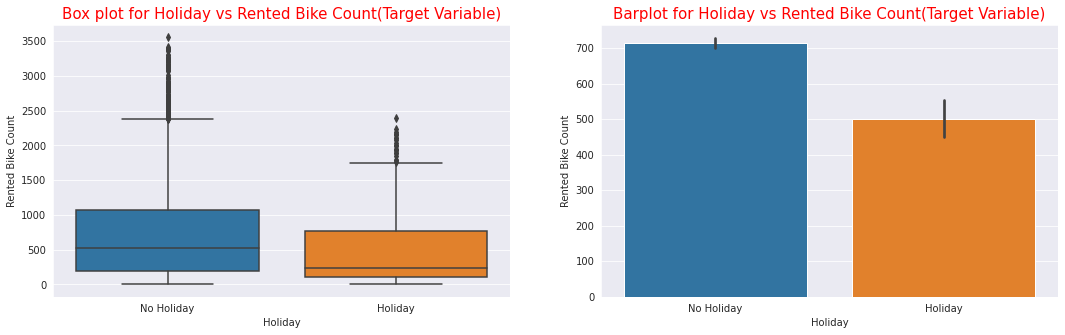

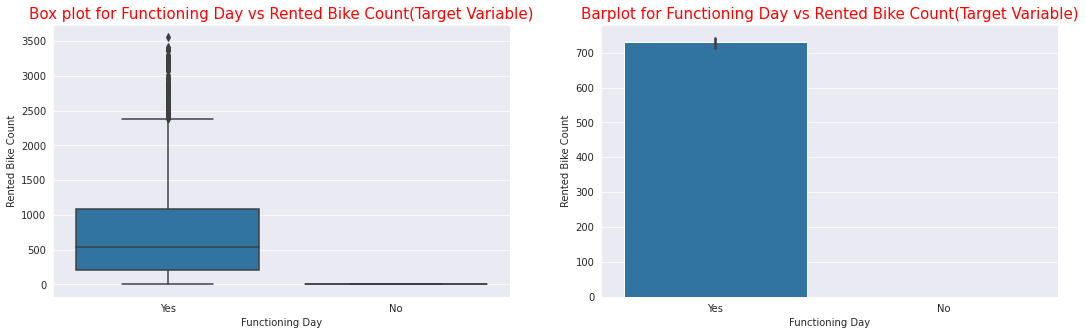

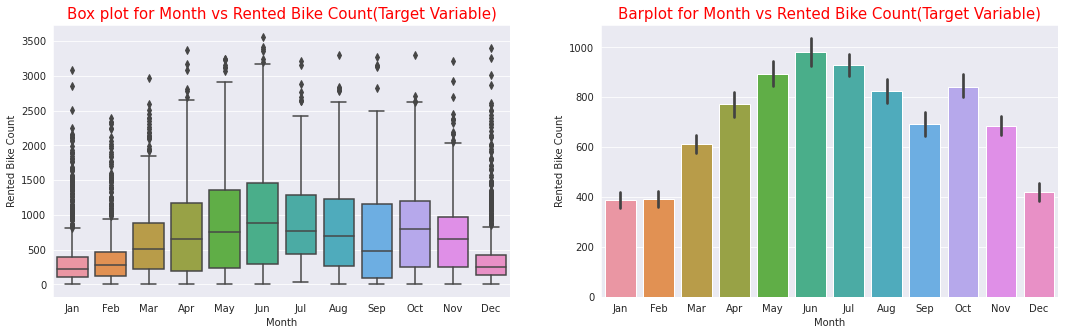

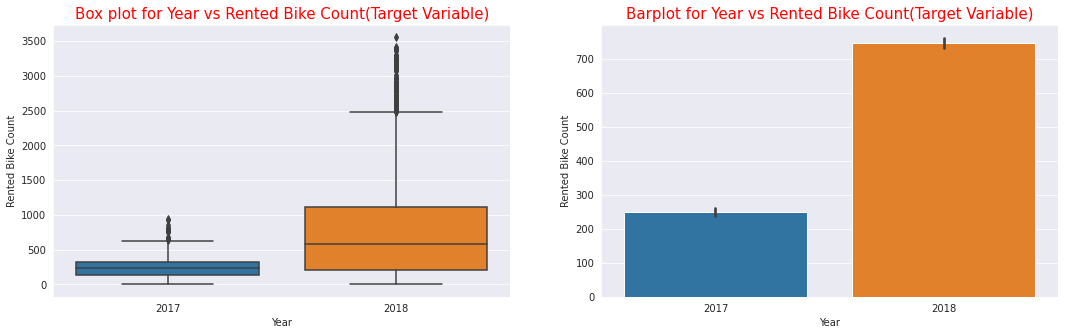

In [20]:
# Lets check the relationship of target variable with categorical columns
for cols in cat_col:
  plt.figure(figsize=(18,5))
  # Box plot 
  plt.subplot(1,2,1)
  sns.boxplot(x= cols, y = 'Rented Bike Count', data = bikes)
  plt.title('Box plot for {} vs Rented Bike Count(Target Variable)'.format(cols), color='r', fontsize=15) 

  # Seperator
  print("\n","="*150,"\n")

  # Barplot
  plt.subplot(1,2,2)
  sns.barplot(x= cols, y = 'Rented Bike Count', data = bikes)
  plt.title('Barplot for {} vs Rented Bike Count(Target Variable)'.format(cols), color='r', fontsize=15) 

  plt.show()

**Inferences**
- Average demand for summer season is highest and least in winter. So there should be enough bikes in summer and autumn season to meet the demand.
- Avearge demand is higher on NO Holidays and Functioning days.

#### **Numerical with Target variable**

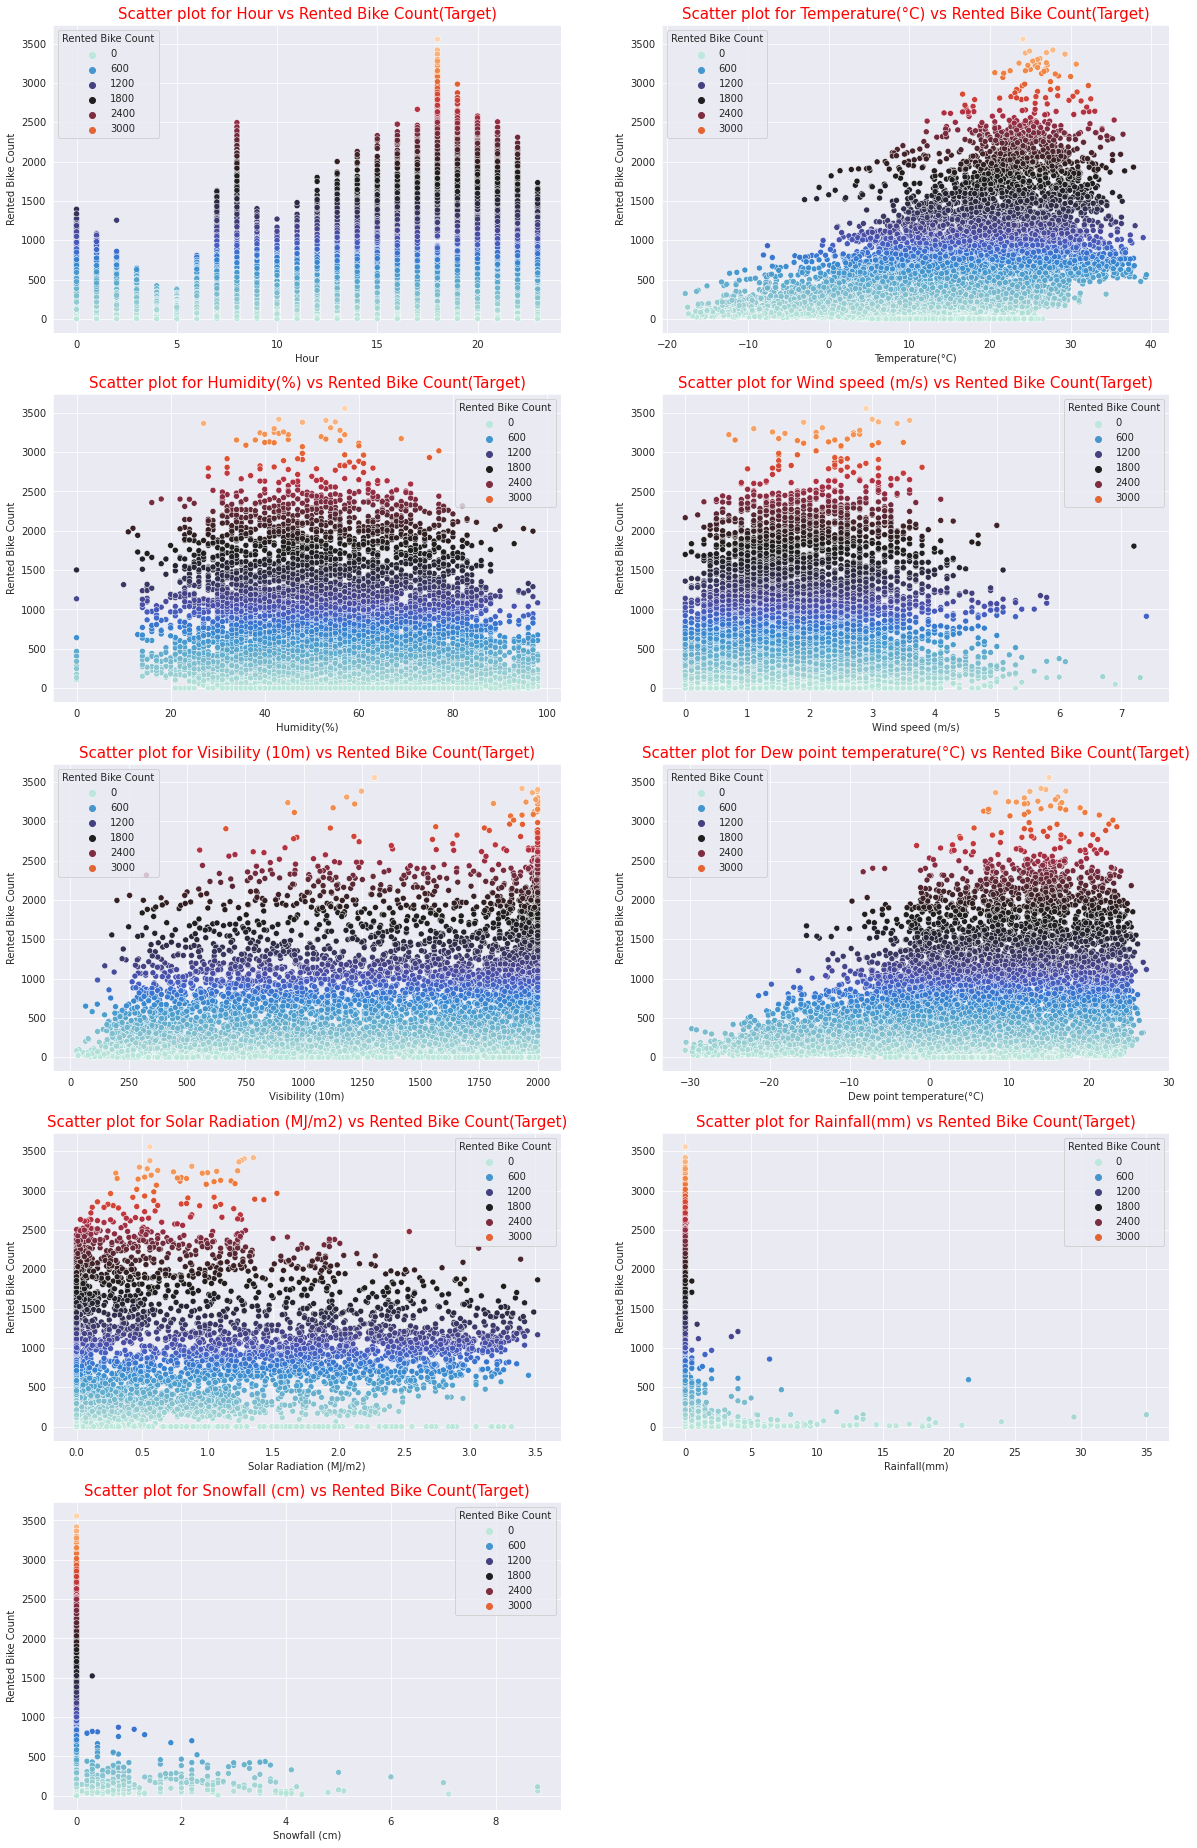

In [21]:
# lets check the relation of numerical variable with target variable
fig = plt.figure(figsize=(20,60))
for n, cols in enumerate(num_col):
  ax = plt.subplot(len(num_col), 2, n+1)
  sns.scatterplot(x=cols,y='Rented Bike Count',hue= 'Rented Bike Count', data=bikes, palette='icefire' )
  plt.title('Scatter plot for {} vs Rented Bike Count(Target)'.format(cols), color='r', fontsize=15)

plt.show()
fig.tight_layout()

**Inferences**
- 
- 
-
-
-

### **Multivariate Analysis**

In [22]:
# # Lets see pairplot for the numerical columns
# sns.pairplot(hue="Rented Bike Count", data=bikes, palette='deep')
# plt.show()

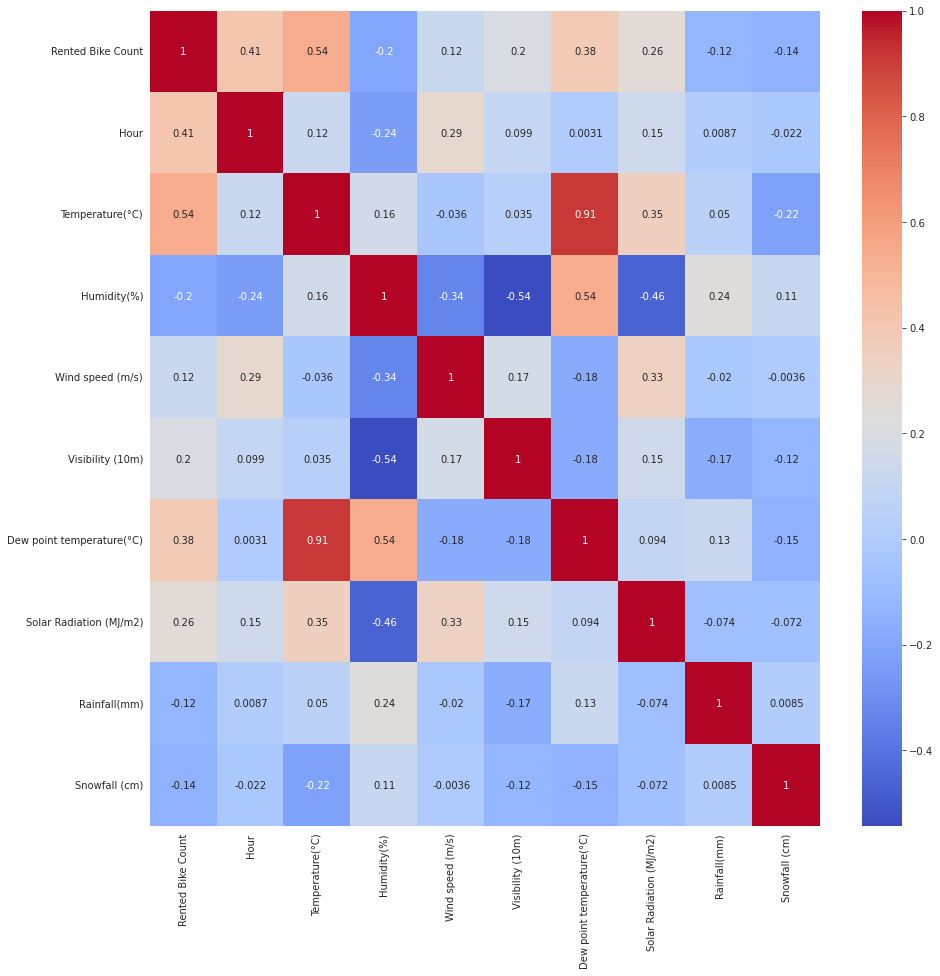

In [23]:
# Lets check the relationship among the variables by heatmap
plt.figure(figsize=(15,15))
sns.heatmap(bikes.corr(), annot=True, cmap='coolwarm')
plt.show()

- Heatmap show multicolinearity among the variables.
- `Temperature(°C)` and `Dew point temperature(°C)` have very high corelation which is 0.91. So we will drop `Dew point temperature(°C)` variable.

In [24]:
# Droping the highly corelated variable 'Dew point temperature(°C)'.
bikes.drop('Dew point temperature(°C)', axis=1, inplace=True)

# **Data Preparation**
##### **Dummy Variable**

In [25]:
# lets create dummy variable by pandas get_dummy method
Season = pd.get_dummies(bikes['Seasons'], drop_first=True)
Month = pd.get_dummies(bikes['Month'], drop_first=True)

In [26]:
# Lets map yes & no to 1 and 0
bikes["Holiday"] = bikes["Holiday"].apply(lambda x : 1 if x=='Yes' else 0)
bikes["Functioning Day"] = bikes["Functioning Day"].apply(lambda x : 1 if x=='Yes' else 0)
bikes["Year"] = bikes["Year"].apply(lambda x : 1 if x=='2018' else 0)

In [27]:
# Lets concatenate the all dummy dataframes to bikes dataframe
bikes = pd.concat([bikes, Season,Month], axis = 1)

# Also drop the original cloumns for which dummy created
bikes.drop(['Seasons','Month'], axis=1,inplace=True)

# Lets see the last 5 rows of the dataset
bikes.tail()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8759,584,23,1.9,43,1.3,1909,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# **Train-Test Split**